In [3]:
# Packages and adjustments to the figures
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [4]:
plt.rcParams["figure.figsize"] = 10,5
plt.rcParams["font.size"] = 16
plt.rcParams.update({"text.usetex": True,"font.family": "sans-serif","font.sans-serif": ["Helvetica"]})

In [17]:
df = pd.read_csv('data_readed.csv')[100:]

In [18]:
df['time_seconds'] = df['millis']/1000

In [19]:
t = df['time_seconds'].to_numpy()

In [20]:
y = df['rpm'].to_numpy()

In [28]:
y2 = df['rpm2'].to_numpy()

In [21]:
samplingFreq = 100; # sampled at 1 kHz = 1000 samples / second

In [ ]:

tlims = [0,1]        # in seconds
signalFreq = [2,50]; # Cycles / second
signalMag = [1,0.2]; # magnitude of each sine
t = np.linspace(tlims[0],tlims[1],(tlims[1]-tlims[0])*samplingFreq)
y = signalMag[0]*np.sin(2*math.pi*signalFreq[0]*t) + signalMag[1]*np.sin(2*math.pi*signalFreq[1]*t)

In [23]:
# Compute the Fourier transform
yhat = np.fft.fft(y);
fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq); # the frequencies in cycles/s

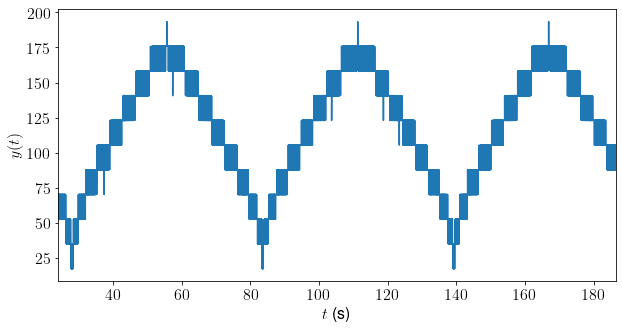

In [22]:
# Plot the signal
plt.figure()
plt.plot(t,y);
plt.ylabel("$y(t)$");
plt.xlabel("$t$ (s)");
plt.xlim([min(t),max(t)]);

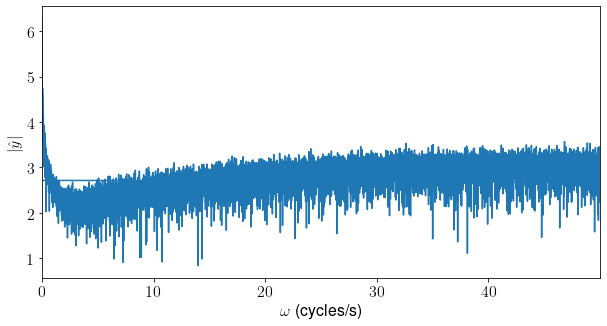

In [27]:
# Plot the power spectrum
plt.figure()
plt.plot(fcycles,np.log10(np.absolute(yhat)));
plt.xlim([0,max(fcycles)]);
plt.xlabel("$\omega$ (cycles/s)");
plt.ylabel("$|\hat{y}|$");

In [29]:
# Compute the Fourier transform
yhat2 = np.fft.fft(y2);

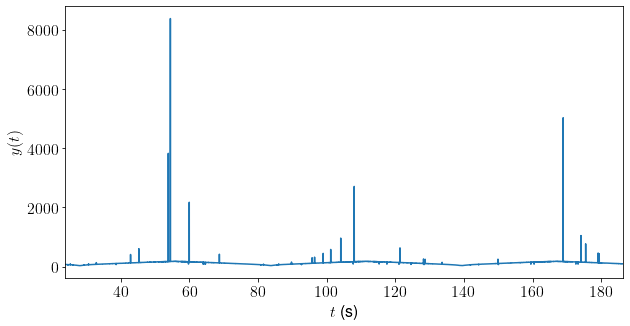

In [30]:
# Plot the signal
plt.figure()
plt.plot(t,y2);
plt.ylabel("$y(t)$");
plt.xlabel("$t$ (s)");
plt.xlim([min(t),max(t)]);

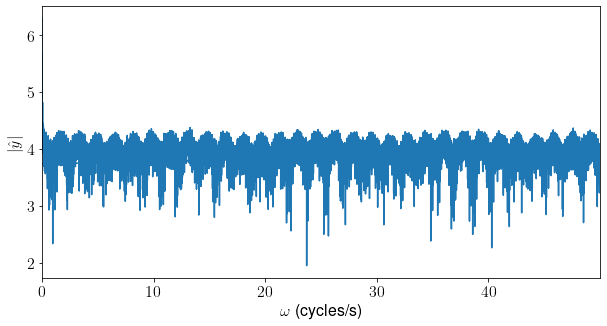

In [31]:
# Plot the power spectrum
plt.figure()
plt.plot(fcycles,np.log10(np.absolute(yhat2)));
plt.xlim([0,max(fcycles)]);
plt.xlabel("$\omega$ (cycles/s)");
plt.ylabel("$|\hat{y}|$");